# Tiempos de ejecución de lectura de JSON en PySpark
Este anexo contempla los tiempos de lectura de que PySpark puede tener al leer archivos JSON. Se generaran archivos JSON con `n` cantidad de pares de coordenadas `(X, Y)` a través de `utils/genjson.py` y se graficarán estos resultados para visualizar de mucho mejor manera estos resultados.

Primeramente se importa la carpeta `utils` con el siguiente código.

In [1]:
import sys
import os.path

parent_dir = os.path.join(os.path.abspath(''), os.path.pardir)
sys.path.append(os.path.abspath(parent_dir))

Y de esta forma es posible utilizar esta utilería.

In [2]:
from utils import genjson

fp = genjson.file(2)
with open(fp, 'r') as file:
    print(file.read())

{"type": "FeatureCollection","features":[{"type":"Feature","properties":{"name":"7","tiempo":"2020-01-01 00:00:00 a 2020-01-01 23:59:59"}, "geometry":{"type":"LineString","coordinates":[[-99.44436525822435, 19.486196707824817],[-99.3573526397126, 19.45725459050624]]}}]}


## Análisis de tiempos de solo lectura de archivos JSON
Primeramente se analizará solo el tiempo de lectura de archivos, tanto con `pyspark` como con la librería de `json` nativa de Python. En ambos casos, se buscará generar archivos `JSON` con `n` pares de coordenadas, para de esta forma ver si existe algun tipo de mejor rendimiento en esta operación básica de lectura de estos tipos de archivos.

### Python nativo
Primeramente se empieza analizando la función básica de `json.load` nativa de Python.

In [3]:
import json

with open(fp, 'r') as file:
    print(json.load(file))

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'name': '7', 'tiempo': '2020-01-01 00:00:00 a 2020-01-01 23:59:59'}, 'geometry': {'type': 'LineString', 'coordinates': [[-99.44436525822435, 19.486196707824817], [-99.3573526397126, 19.45725459050624]]}}]}


De esta forma, se puede definir una función auxiliar, que será la que regresará un tiempo de ejecución por `n` número de pares de coordenadas que se quieran analizar los tiempos de ejecución.

In [4]:
import os
import timeit

def read_json(n):
    file_path = genjson.file(n)
    
    with open(file_path) as file:
        start = timeit.default_timer()
        json.load(file)
        total = timeit.default_timer() - start

    os.remove(file_path)
    
    return total

Y ahora se llama a la función `time_complexity` de nuestra utilería.

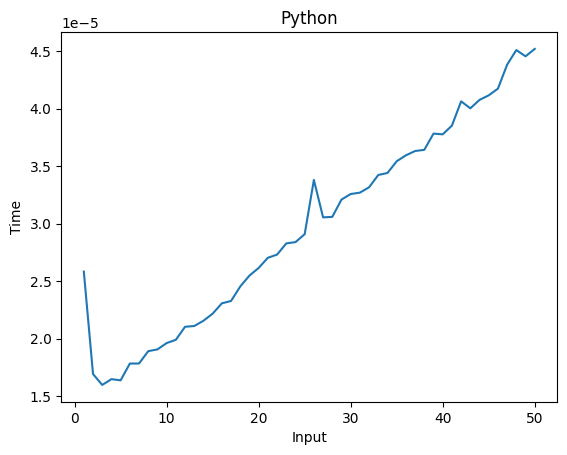

In [5]:
from utils import plotfn

plotfn.time_complexity(read_json, max_input_size=50, title="Python", xlabel="Input", ylabel="Time")

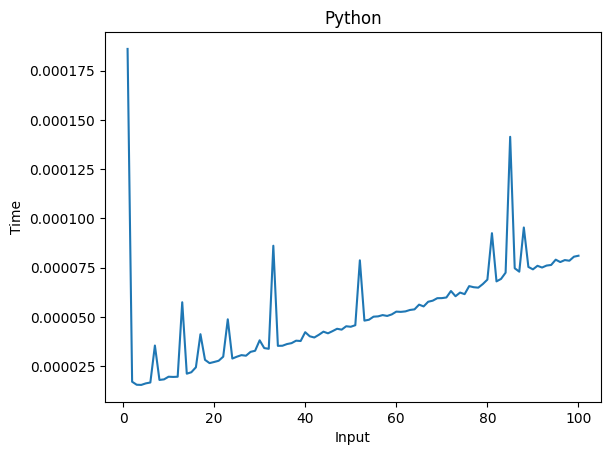

In [6]:
plotfn.time_complexity(read_json, max_input_size=100, title="Python", xlabel="Input", ylabel="Time")